#### Block 1:  Import general purpose packages for ease of use and improved performance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pprint

#### Block 2:  Import packages for a typical deep learning workflow using TensorFlow and Keras.  Import the IMDB dataset from Keras.

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

Understand the imdb package:

In [3]:
dir(imdb)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'get_word_index',
 'load_data']

In [4]:
help(imdb.get_word_index)

Help on function get_word_index in module keras.src.datasets.imdb:

get_word_index(path='imdb_word_index.json')
    Retrieves a dict mapping words to their index in the IMDB dataset.
    
    Args:
        path: where to cache the data (relative to `~/.keras/dataset`).
    
    Returns:
        The word index dictionary. Keys are word strings, values are their
        index.
    
    Example:
    
    ```python
    # Use the default parameters to keras.datasets.imdb.load_data
    start_char = 1
    oov_char = 2
    index_from = 3
    # Retrieve the training sequences.
    (x_train, _), _ = keras.datasets.imdb.load_data(
        start_char=start_char, oov_char=oov_char, index_from=index_from
    )
    # Retrieve the word index file mapping words to indices
    word_index = keras.datasets.imdb.get_word_index()
    # Reverse the word index to obtain a dict mapping indices to words
    # And add `index_from` to indices to sync with `x_train`
    inverted_word_index = dict(
        (i + ind

In [5]:
help(imdb.load_data)

Help on function load_data in module keras.src.datasets.imdb:

load_data(path='imdb.npz', num_words=None, skip_top=0, maxlen=None, seed=113, start_char=1, oov_char=2, index_from=3, **kwargs)
    Loads the [IMDB dataset](https://ai.stanford.edu/~amaas/data/sentiment/).
    
    This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment
    (positive/negative). Reviews have been preprocessed, and each review is
    encoded as a list of word indexes (integers).
    For convenience, words are indexed by overall frequency in the dataset,
    so that for instance the integer "3" encodes the 3rd most frequent word in
    the data. This allows for quick filtering operations such as:
    "only consider the top 10,000 most
    common words, but eliminate the top 20 most common words".
    
    As a convention, "0" does not stand for a specific word, but instead is used
    to encode the pad token.
    
    Args:
        path: where to cache the data (relative to `~/.keras/dataset

####  Block 3:  Define functions called in subsequent blocks.

In [6]:
def decode_review(encoded_review, indices_to_words):
    ''' Return a decoded review as a string. '''
    ## Try to get the word from the IMDb dataset based on the newly mapped
    ## index from indices_to_words, and return a complete review sentence with
    ## words separated by  white spaces.
    return ' '.join(indices_to_words[i] for i in encoded_review)

n_validate = 10000

def reviews_as_one_hot(reviews, dimension=n_validate):
    ''' Use one-hot encoding to represent a set of reviews. '''
    results = np.zeros((len(reviews), dimension))

    for i, review in enumerate(reviews):
        for j in review:
            results[i, j] = 1.

    return results

#### Block 4:  Load the IMDB dataset, keeping only the 10,000 most frequent words.

In [7]:
# Assign default values of load_data arguments to convenience variables.
start_char = 1
oov_char = 2
index_from = 3

# Load the dataset.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    start_char=start_char,
    oov_char=oov_char,
    index_from=index_from,
    num_words=n_validate)

# Count the number of reviews in the datasets.
n_train = len(train_data)
n_test = len(test_data)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
print('- First review of the training dataset:', train_data[0])
print('- Data type of first review:', type(train_data[0]))
print('- Label used to classify it as positive or negative:', train_labels[0])
print('- Number of reviews in the training dataset:', len(train_labels))

## Does the review appear as expected based on your reading of the background
## information?
## -> The review appears as a sequence of integers rather than words.

## Is the review positive or negative? Briefly explain how you reached your
## conclusion
## -> Despite I don't know the full and readable sentence, I can guess that this
##    is a positive review since its label is 1.

## Does the training set contain the advertised number of reviews?
## -> Yes, the number of reviews is 25000 as advertised.

- First review of the training dataset: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
- Data type of first

#### Block 5:  Load the dictionary linking words in reviews to their rank in the frequency table.  Create a companion dictionary with words and ranks swapped (this is used to translate an encoded review to text).

In [10]:
# Load the word to rank dictionary.
words_to_indices = keras.datasets.imdb.get_word_index()

## Add a comment here that explains creation of the companion dictionary,
## including addition of tags indicating the start of the review and words that
## appear in the review but not in the work to rank dictionary.
## -> From the dictionary of word and its corresponding index from the imdb
##    dataset (words_to_indices), try to create a new dictionary that increase
##    the original index by 3 (index_from) so that the new dictionary will have
##    space for the first character which is "[START]" at index 1 and
##    out-of-vocabulary character which is "[OOV]" at index 2.
indices_to_words = {i + index_from: word for word, i in words_to_indices.items()}
# Add entries for start and out-of-vocabulary.
indices_to_words[start_char] = "[START]"
indices_to_words[oov_char] = "[OOV]"

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
print('- The number of words in the word to rank dictionary: ',
      len(words_to_indices))
# The index in imdb starts from 1, so first word should start from 4
top_10_words = [
    indices_to_words[i]
    for i in range(1 + index_from, (1 + index_from) + 10)
]

print('- The ten most frequent words: ', top_10_words)

## Only the 10,000 most frequent words were retained when the dataset was
## loaded. What fraction of the total number of words in the dataset is this?
print("- Fraction of words retained:", 10000 / len(words_to_indices))

## What are the ten most frequent words? Are you surprised by any of the words
## in the list?
## -> The top 10 words have been printed above. I was surprised by two words:
##    'br' and 'i'. I don't know what 'br' means, but 'i' may stand for 'I'.

- The number of words in the word to rank dictionary:  88584
- The ten most frequent words:  ['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it', 'i']
- Fraction of words retained: 0.11288720310665583


#### Block 6:  Reconstruct a randomly selected review from the training set back to text as a check.

In [22]:
# Construct a (pseudo)random number generator.
rng = np.random.default_rng()

# Generate the index of a randomly chosen review.
i = rng.integers(0, n_train)

# Display the sentiment of the chosen review.
if train_labels[i] == 0:
    print('The following review has been classified as negative.')
else:
    print('The following review has been classified as positive.')

# Decode the chosen review.  Display it using pretty print.
review = decode_review(train_data[i], indices_to_words)
pprint.pprint(review)

## Write a comment here briefly stating whether you agree with the
## sentiment assigned in the dataset and why.
## -> I agree that the review below is positive because the viewer was gradually
##    engaged as the film went on.

The following review has been classified as positive.
('[START] [OOV] [OOV] is one little small brilliant i started watching it and '
 'at the beginning i got a little bored since the pacing was slow and the main '
 'idea of one guy meeting a girl who is lost was not really new but as the '
 'film went on i started getting increasingly and gradually engaged by the '
 'film the fantastic writing and the charming romance the film was extremely '
 'simple and natural and after some time i felt i was watching a real [OOV] of '
 "one guy's life there's one very good reason the film got this feel and it's "
 'the fresh talent called [OOV] [OOV] he is extremely convincing as the simple '
 'kind hearted and struggling [OOV] whose new love [OOV] him to make [OOV] and '
 'fight for a better life throughout the film he is presented as an ordinary '
 'mischievous [OOV] but also as a helping and loving person who like anyone '
 'else will do anything to protect his love [OOV] portrays all the diffe

#### Block 7:  Recode the training and test data sets.

In [23]:
x_train = reviews_as_one_hot(train_data)
y_train = train_labels.copy()
x_test = reviews_as_one_hot(test_data)
y_test = test_labels.copy()

In [38]:
type(train_data)

numpy.ndarray

In [26]:
x_train.shape

(25000, 10000)

In [45]:
## Check the size of the input array against the expectations spelled out above.
print(f'The number of rows of the training input array, {train_data.shape[0]},',
      'is correct.')
print('The number of rows of the training input array after encoded is',
      x_train.shape[0])
print('The number of columns of the training input array after encoded is',
      x_train.shape[1])

## -> So after encoded the training data, the produced result (x_train) has the
##    number of columns increased from 1 to 10000, while the number of rows are kept unchanged.

## -> The encoded test data has same result.

The number of rows of the training input array, 25000, is correct.
The number of rows of the training input array after encoded is 25000
The number of columns of the training input array after encoded is 10000


#### Block 8:  Build the model.

In [46]:
model = keras.Sequential([
    ## 2 input layers
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    ## 1 output layer
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#### Block 9:  Reserve part of the training data set for validation.

In [47]:
# Reserve some of the reviews and labels for validation.
n_validate = 10000
x_validate = x_train[:n_validate]
y_validate = y_train[:n_validate]
x_train_part = x_train[n_validate:]
y_train_part = y_train[n_validate:]

#### Block 10:  Train the model

In [48]:
n_epochs = 20
n_batch = 512
history = model.fit(x_train_part,
                    y_train_part,
                    epochs=n_epochs,
                    batch_size=n_batch,
                    validation_data=(x_validate, y_validate))
## Record an estimate of the average epoch time here.
## -> (max + min) / 2 = (112 + 35) / 2 = 73.5ms

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.7020 - loss: 0.5854 - val_accuracy: 0.8679 - val_loss: 0.3792
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9020 - loss: 0.3187 - val_accuracy: 0.8825 - val_loss: 0.3093
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9297 - loss: 0.2302 - val_accuracy: 0.8909 - val_loss: 0.2814
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9438 - loss: 0.1833 - val_accuracy: 0.8829 - val_loss: 0.2878
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9527 - loss: 0.1539 - val_accuracy: 0.8791 - val_loss: 0.3001
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9601 - loss: 0.1296 - val_accuracy: 0.8632 - val_loss: 0.3584
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9657 - loss: 0.1128 - val_accuracy: 0.8759 - val_loss: 0.3275
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9738 - loss: 0.0927 - val_accuracy: 0.8783 - 

In [52]:
help(tf.keras.Model.fit)

Help on function fit in module keras.src.backend.tensorflow.trainer:

fit(self, x=None, y=None, batch_size=None, epochs=1, verbose='auto', callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1)
    Trains the model for a fixed number of epochs (dataset iterations).
    
    Args:
        x: Input data. It can be:
            - A NumPy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
            - A backend-native tensor, or a list of tensors
            (in case the model has multiple inputs).
            - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
            - A `keras.utils.PyDataset` returning `(inputs, targets)` or
            `(inputs, targets, sample_weights)`.
            - A `tf.data.Dataset` yielding `(

#### Block 11:  Visualize the training history.

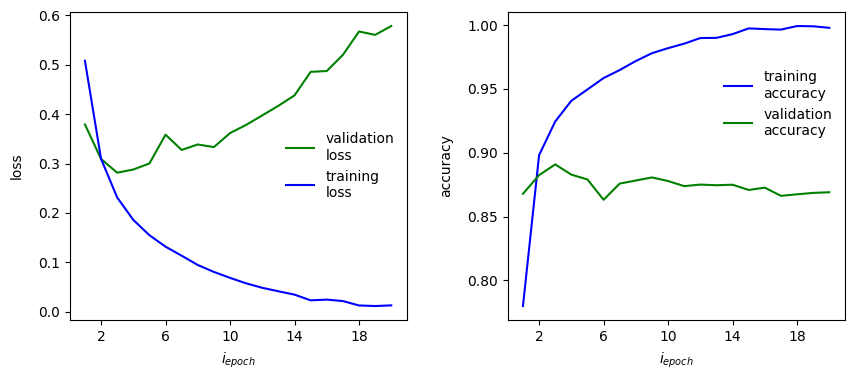

In [53]:
history_dict = history.history
training_loss = history_dict['loss']
validation_loss = history_dict['val_loss']
training_accuracy = history_dict['accuracy']
validation_accuracy = history_dict['val_accuracy']
idx_epochs = range(1, n_epochs+1)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(idx_epochs, validation_loss, color=(0.0, 0.5, 0.0),
            label='validation\nloss')
axs[0].plot(idx_epochs, training_loss, 'b', label='training\nloss')
axs[0].set_xticks(range(2, n_epochs+1, 4))
axs[0].set_xlabel(r'$i_{epoch}$', labelpad=5)
axs[0].set_ylabel('loss', labelpad=10)
axs[0].legend(loc='center right', frameon=False)
axs[1].plot(idx_epochs, training_accuracy, 'b', label='training\naccuracy')
axs[1].plot(idx_epochs, validation_accuracy, color=(0.0, 0.5, 0.0),
            label='validation\naccuracy')
axs[1].set_xticks(range(2, n_epochs+1, 4))
axs[1].set_xlabel(r'$i_{epoch}$', labelpad=5)
axs[1].set_ylabel('accuracy', labelpad=10)
axs[1].legend(loc='center right', frameon=False, bbox_to_anchor=(0.9, 0.65),
              bbox_transform=fig.transFigure)
fig.subplots_adjust(wspace=0.3)
fig.show()
## Insert a code cell here to contain your answers to the questions in the
## subsection on visualizing the training history.

In [ ]:
## Which can be described as a direct relationship? Which can be described as an
## inverse relationship? Which are neither a direct relationship nor an inverse
## relationship?
## -> I can see that training accuracy and epoch number have direct relationship
##    because the training accuracy increases as the number of epochs increases.
## -> Meanwhile, training loss and epoch number have inverse relationship
##    because the training loss decreases as the number of epochs increases.
## -> The validation loss and epoch number can be considered as inverse
##    relationship because the validation loss decreases a bit at the beginning
##    but then increases as the number of epochs increases.
## -> The validation loss and training loss can be considered as inverse
##    relationship too since the validation loss increases as the training loss
##    increases.
## -> validation accuracy is neither a direct relationship nor an inverse
##    relationship because it is likely stable when epoch number increases.

## Drawing on your experience from Machine Learning, comment on the divergence
## between the validation loss and the training loss.
## -> The validation loss increases as the training loss increases.This is a
##    sign of overfitting (learning well on training data but not generalizing
##    well to new data).

## Based on the figure, estimate the number of epochs that will result in the
## best model. Briefly discuss how you arrived at your estimate, included how
## you defined “best”.
## -> I believe the best epoch is the point where validation loss is lowest and
##    validation accuracy is highest. And I can see it locates at the third
##    epoch. So number of epochs that will result in the best model is 3.

#### Block 12:  Retrain the model, from the ground up.

In [55]:
# Reset the number of epochs, based on prior results.
n_epochs = 3
# Define the model afresh.
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
# Rebuild the model.
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# Retrain the model, using the entire training data set.
model.fit(x_train, y_train, epochs=n_epochs, batch_size=n_batch)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.7349 - loss: 0.5574
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9026 - loss: 0.2841
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9274 - loss: 0.2147


#### Block 13:  Evaluate the retrained model.

In [56]:
results = model.evaluate(x_test, y_test, return_dict=True)
test_accuracy_pct = 100*results['accuracy']
test_loss = results['loss']
results_str = 'The model has an accuracy of {:.2f}%, with a loss of {:.2f}.'
print(results_str.format(test_accuracy_pct, test_loss))
## Record the accuracy and loss here.
## -> The model has an accuracy of 88.91%, with a loss of 0.28.

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8877 - loss: 0.2785
The model has an accuracy of 88.91%, with a loss of 0.28.


#### Block 14:  Make predictions using the retrained model

In [57]:
predicted_sentiments = model.predict(x_test)
n_predict = 10
# Note: A number close to 1 is interpreted as indicating a positive review, and
# a number close to 0 is interpreted as indicating a negative review.
print(predicted_sentiments[:n_predict])

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
[[0.20124252]
 [0.9995573 ]
 [0.8403173 ]
 [0.74374217]
 [0.94876695]
 [0.681313  ]
 [0.99899226]
 [0.01434402]
 [0.94775826]
 [0.98613286]]


In [59]:
## Add code to print reconstructed reviews here.
## Add a comment saying whether you agree with the predicted sentiments here.

## Identify a predicted sentiment that you would label as positive, a predicted
## sentiment that you would label as negative, and a predicted sentiment that
## you would label as indeterminate.
## -> Based on the result, I believe the first review is negative, the second
##    review is positive, and the sixth review is indeterminate (the one with
##    0.681313)

## Check the first review
print('First review:')
review = decode_review(test_data[0], indices_to_words)
pprint.pprint(review)
## -> This is a negative review because the user mentioned that 'the cast
## rendered terrible performances'.

## Check the second review
print('Second review:')
review = decode_review(test_data[1], indices_to_words)
pprint.pprint(review)
## -> This is a positive review with many compliments.

## Check the sixth review
print('6th review:')
review = decode_review(test_data[5], indices_to_words)
pprint.pprint(review)
## -> This is likely a positive review but there is a word 'disgusted' that
##    make it feel like a negative review at the beginning.

First review:
('[START] please give this one a miss br br [OOV] [OOV] and the rest of the '
 "cast rendered terrible performances the show is flat flat flat br br i don't "
 'know how michael madison could have allowed this one on his plate he almost '
 "seemed to know this wasn't going to work out and his performance was quite "
 '[OOV] so all you madison fans give this a miss')
First review:
('[START] this film requires a lot of patience because it focuses on mood and '
 'character development the plot is very simple and many of the scenes take '
 'place on the same set in frances [OOV] the sandy dennis character apartment '
 'but the film builds to a disturbing climax br br the characters create an '
 "atmosphere [OOV] with sexual tension and psychological [OOV] it's very "
 'interesting that robert altman directed this considering the style and '
 'structure of his other films still the trademark altman audio style is '
 'evident here and there i think what really makes this film w